### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
startup = pd.read_csv('50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startup.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
# startup['State'] = pd.factorize(startup['State'])[0]

### Encoding state column

In [8]:
encoded = pd.get_dummies(startup,columns=["State"],drop_first=True)
startup = encoded

In [9]:
startup["R&D Spend"][startup["R&D Spend"]==0] = round(startup['R&D Spend'].mean(),2)

In [10]:
startup['Marketing Spend'][startup['Marketing Spend']==0] = round(startup['Marketing Spend'].mean(),2)

In [11]:
startup

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [12]:
startup = startup.sample(frac=True,random_state=42)

### Visualizations

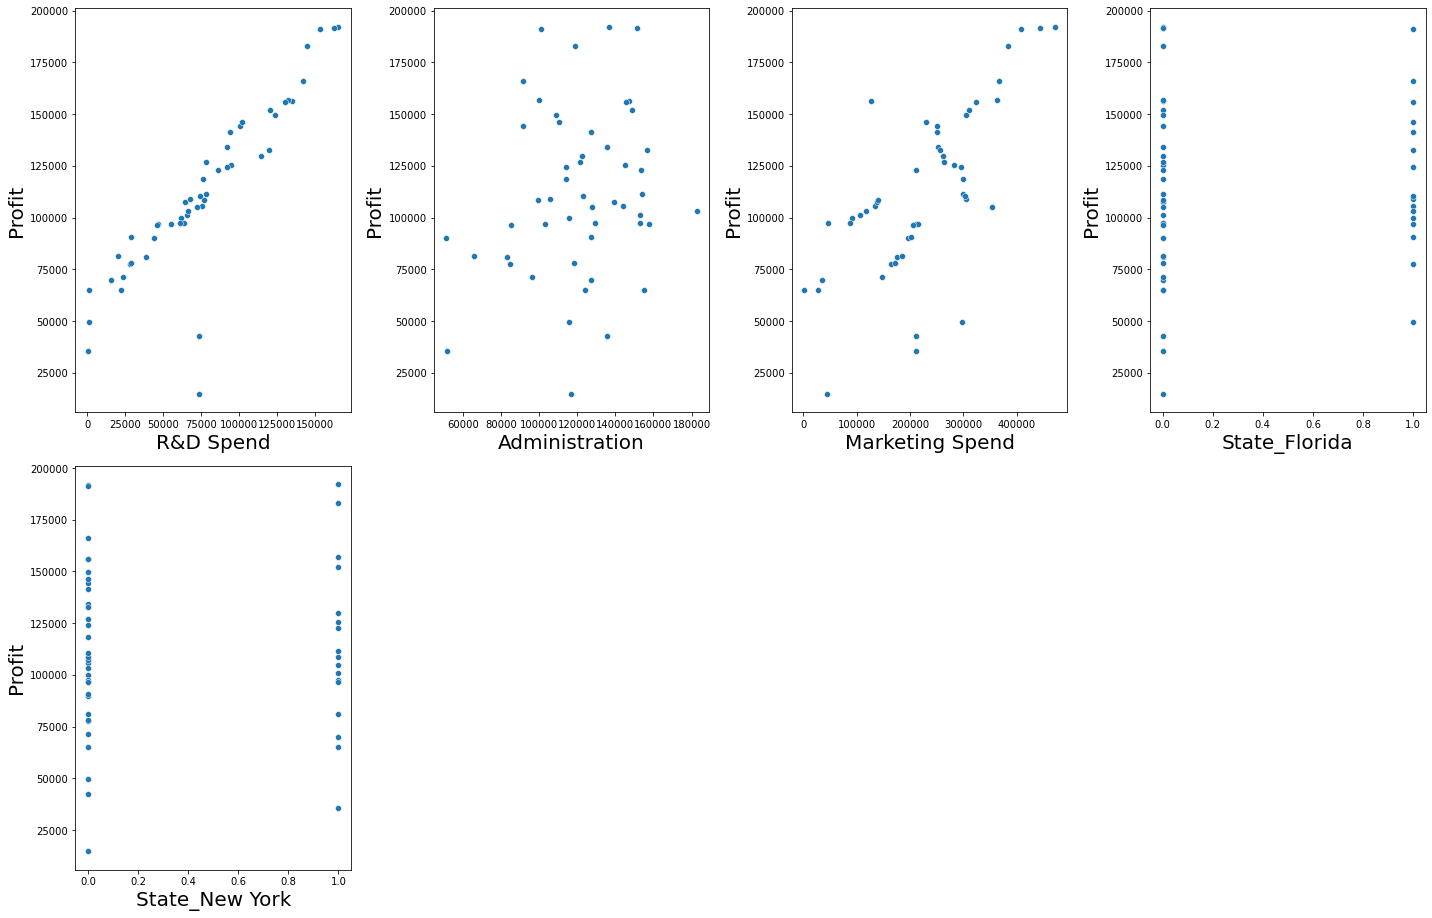

In [15]:
X = startup.drop('Profit',axis=1)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Profit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Preparing endog and exog for model preparation

In [13]:
Y = startup.Profit
X = startup.drop('Profit',axis=1)

### Correlation matrix and vif

In [42]:
corrMatrix = X.corr()

<AxesSubplot:>

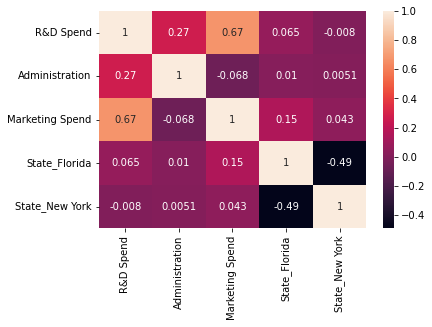

In [43]:
sns.heatmap(corrMatrix, annot=True)


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
vif_data = pd.DataFrame({'vif':vif})
vif_data["feature"] = X.columns
vif_data

,vif,feature
0,8.825557,R&D Spend
1,5.842973,Administration
2,8.909968,Marketing Spend
3,2.024493,State_Florida
4,2.025557,State_New York


In [81]:
ols = sm.OLS(Y,sm.add_constant(X)).fit()

In [82]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     38.00
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           6.76e-15
Time:                        15:24:43   Log-Likelihood:                -558.88
No. Observations:                  50   AIC:                             1130.
Df Residuals:                      44   BIC:                             1141.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.823e+04   1.39e+04      2.741      0.009    1.01e+04    6.63e+04
R&D Spend           0.7114      0.092      7.771      0.000       0.527       0.896
Administration      0.0090      0.105      0.086      0.932      -0.202       0.220
Marketing Spend     0.0637      0.036      1.795      0.080      -0.008       0.135
State_Florida    6262.8935   6592.588      0.950      0.347   -7023.595    1.95e+04
State_New York   5562.2674   6422.191      0.866      0.391   -7380.809    1.85e+04
==============================================================================
Omnibus:                       53.738   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.574
Skew:                          -2.871   Prob(JB):                     4.79e-59
Kurtosis:                      12.795   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
ols.rsquared, ols.rsquared_adj

(0.8119613459462234, 0.7905933170764761)

In [84]:
X_1 = X.drop("Marketing Spend",axis=1)
X_1

,R&D Spend,Administration,State_Florida,State_New York
13,91992.39,135495.07,0,0
39,38558.51,82982.09,0,0
30,61994.48,115641.28,1,0
45,1000.23,124153.04,0,1
17,94657.16,145077.58,0,1
48,542.05,51743.15,0,1
26,75328.87,144135.98,1,0
25,64664.71,139553.16,0,0
32,63408.86,129219.61,0,0
19,86419.70,153514.11,0,1


In [85]:
vif=[variance_inflation_factor(X_1.values, i)for i in range(len(X_1.columns))]
vif_data = pd.DataFrame({'vif':vif})
vif_data["feature"] = X_1.columns
vif_data

,vif,feature
0,4.478659,R&D Spend
1,5.744119,Administration
2,1.846972,State_Florida
3,1.883215,State_New York


In [86]:
ols1 = sm.OLS(Y,sm.add_constant(X_1)).fit()

In [87]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     44.50
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           4.35e-15
Time:                        15:24:51   Log-Likelihood:                -560.64
No. Observations:                  50   AIC:                             1131.
Df Residuals:                      45   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.003e+04   1.26e+04      3.972      0.000    2.47e+04    7.54e+04
R&D Spend          0.8301      0.065     12.802      0.000       0.700       0.961
Administration    -0.0580      0.100     -0.580      0.565      -0.259       0.143
State_Florida   8790.8471   6597.366      1.332      0.189   -4496.931    2.21e+04
State_New York  7519.7967   6483.186      1.160      0.252   -5538.010    2.06e+04
==============================================================================
Omnibus:                       60.691   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.330
Skew:                          -3.201   Prob(JB):                     5.84e-89
Kurtosis:                      15.412   Cond. No.                     7.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
ols1.rsquared, ols1.rsquared_adj

(0.7981964073101309, 0.7802583101821425)

In [89]:
X_2 = X_1.drop(["State_New York",'State_Florida'],axis=1)
X_2

,R&D Spend,Administration
13,91992.39,135495.07
39,38558.51,82982.09
30,61994.48,115641.28
45,1000.23,124153.04
17,94657.16,145077.58
48,542.05,51743.15
26,75328.87,144135.98
25,64664.71,139553.16
32,63408.86,129219.61
19,86419.70,153514.11


In [90]:
ols2 = sm.OLS(Y,sm.add_constant(X_2)).fit()

In [91]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     87.73
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.36e-16
Time:                        15:24:57   Log-Likelihood:                -561.79
No. Observations:                  50   AIC:                             1130.
Df Residuals:                      47   BIC:                             1135.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.499e+04   1.21e+04      4.535      0.000    3.06e+04    7.94e+04
R&D Spend          0.8357      0.065     12.904      0.000       0.705       0.966
Administration    -0.0581      0.100     -0.580      0.565      -0.260       0.143
==============================================================================
Omnibus:                       68.203   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.190
Skew:                          -3.648   Prob(JB):                    2.80e-126
Kurtosis:                      17.976   Cond. No.                     6.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
ols2.rsquared, ols2.rsquared_adj

(0.7887345719598504, 0.779744553745376)

In [94]:
X_3 = X_2.drop(['Administration'],axis=1)
X_3

,R&D Spend
13,91992.39
39,38558.51
30,61994.48
45,1000.23
17,94657.16
48,542.05
26,75328.87
25,64664.71
32,63408.86
19,86419.70


In [95]:
ols3 = sm.OLS(Y,sm.add_constant(X_3)).fit()

In [96]:
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           9.53e-18
Time:                        15:25:19   Log-Likelihood:                -561.97
No. Observations:                  50   AIC:                             1128.
Df Residuals:                      48   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.871e+04   5442.401      8.951      0.000    3.78e+04    5.97e+04
R&D Spend      0.8256      0.062     13.326      0.000       0.701       0.950
==============================================================================
Omnibus:                       67.654   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                          -3.616   Prob(JB):                    5.58e-123
Kurtosis:                      17.763   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
ols3.rsquared, ols3.rsquared_adj

(0.7872217209025856, 0.7827888400880562)

### Preparing table of R2 score and adj R2 score

In [100]:
scores = pd.DataFrame()
scores["rsquared"] = [[ols.rsquared], [ols1.rsquared], [ols2.rsquared],
                      [ols3.rsquared], [ols_final.rsquared]]
scores["adj_rsquared"] = [[ols.rsquared_adj], [ols1.rsquared_adj],
                          [ols2.rsquared_adj], [ols3.rsquared_adj],
                          [ols_final.rsquared_adj]]

In [101]:
scores

,rsquared,adj_rsquared
0,[0.8119613459462234],[0.7905933170764761]
1,[0.7981964073101309],[0.7802583101821425]
2,[0.7887345719598504],[0.779744553745376]
3,[0.7872217209025856],[0.7827888400880562]
4,[0.798196407310131],[0.7802583101821426]


## Here we can see by the table that model with name ols is the best and it has the highest adj and R2 score

## As we can see the coeficient of administration is very less approx=0 so we can drop that

In [118]:
X = X.drop("Administration",axis=1)

In [130]:
ols_final = sm.OLS(Y, sm.add_constant(X)).fit()
ols_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     48.57
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           9.06e-16
Time:                        16:10:45   Log-Likelihood:                -558.88
No. Observations:                  50   AIC:                             1128.
Df Residuals:                      45   BIC:                             1137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.928e+04   6683.244      5.877      0.000    2.58e+04    5.27e+04
R&D Spend           0.7148      0.082      8.751      0.000       0.550       0.879
Marketing Spend     0.0626      0.033      1.910      0.063      -0.003       0.129
State_Florida    6304.0930   6502.243      0.970      0.337   -6792.096    1.94e+04
State_New York   5598.1128   6337.581      0.883      0.382   -7166.430    1.84e+04
==============================================================================
Omnibus:                       53.909   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.229
Skew:                          -2.879   Prob(JB):                     1.27e-59
Kurtosis:                      12.850   Cond. No.                     8.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now doing the transformations in the final selected model

## Sq Root Transformation of X


In [120]:
X_sqrt = np.sqrt(X)

In [121]:
ols_X_sqrt = sm.OLS(Y, sm.add_constant(X_sqrt)).fit()

In [122]:
ols_X_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     35.90
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.81e-13
Time:                        15:40:40   Log-Likelihood:                -564.83
No. Observations:                  50   AIC:                             1140.
Df Residuals:                      45   BIC:                             1149.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5843.1205   1.12e+04     -0.522      0.604   -2.84e+04    1.67e+04
R&D Spend         310.6391     39.411      7.882      0.000     231.260     390.018
Marketing Spend    67.6671     27.533      2.458      0.018      12.212     123.122
State_Florida    7584.0797   7339.182      1.033      0.307   -7197.792    2.24e+04
State_New York   1.039e+04   7121.664      1.459      0.152   -3956.794    2.47e+04
==============================================================================
Omnibus:                       32.492   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.410
Skew:                          -1.682   Prob(JB):                     4.27e-22
Kurtosis:                       8.994   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root Transformation of Y

In [125]:
ols_Y_sqrt = sm.OLS(np.sqrt(Y), sm.add_constant(X)).fit()

In [126]:
ols_Y_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     27.41
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.47e-11
Time:                        15:41:15   Log-Likelihood:                -248.21
No. Observations:                  50   AIC:                             506.4
Df Residuals:                      45   BIC:                             516.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             216.9449     13.382     16.212      0.000     189.993     243.897
R&D Spend           0.0011      0.000      6.481      0.000       0.001       0.001
Marketing Spend  9.738e-05   6.57e-05      1.483      0.145   -3.49e-05       0.000
State_Florida      14.2099     13.019      1.091      0.281     -12.013      40.432
State_New York     11.5247     12.690      0.908      0.369     -14.034      37.083
==============================================================================
Omnibus:                       63.800   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.438
Skew:                          -3.392   Prob(JB):                    8.54e-102
Kurtosis:                      16.319   Cond. No.                     8.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root Transformation of X and Y


In [127]:
ols_XY_sqrt = sm.OLS(np.sqrt(Y), sm.add_constant(np.sqrt(X))).fit()

In [128]:
ols_XY_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           4.01e-11
Time:                        15:41:20   Log-Likelihood:                -249.34
No. Observations:                  50   AIC:                             508.7
Df Residuals:                      45   BIC:                             518.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             145.8540     20.357      7.165      0.000     104.853     186.855
R&D Spend           0.4740      0.072      6.614      0.000       0.330       0.618
Marketing Spend     0.1041      0.050      2.078      0.043       0.003       0.205
State_Florida      15.9777     13.346      1.197      0.237     -10.902      42.858
State_New York     18.7843     12.950      1.450      0.154      -7.299      44.868
==============================================================================
Omnibus:                       56.533   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.470
Skew:                          -2.908   Prob(JB):                     1.44e-78
Kurtosis:                      14.758   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Outlier detection using cooks distance

In [132]:
model_influence = ols_final.get_influence()
(c, _) = model_influence.cooks_distance

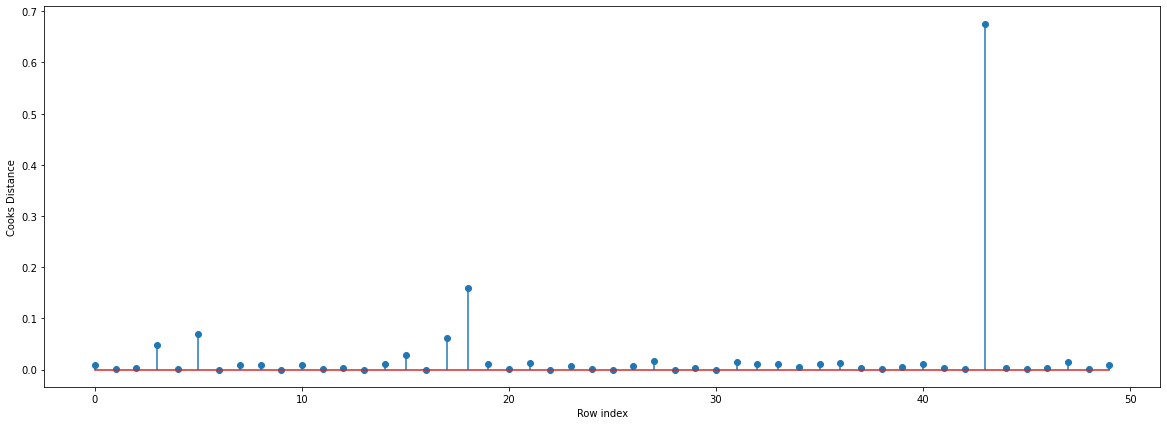

In [134]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [135]:
np.argmax(c)

43

In [137]:
startup_new = startup
startup_new1 = startup_new.drop(startup_new.index[43], axis=0).reset_index()
startup_new1
Y = startup_new1.Profit
X = startup_new1.drop('Profit',axis=1)


In [138]:
ols_final1 = sm.OLS(Y, sm.add_constant(X)).fit()
ols_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           2.31e-27
Time:                        16:35:11   Log-Likelihood:                -508.05
No. Observations:                  49   AIC:                             1030.
Df Residuals:                      42   BIC:                             1043.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.646e+05    1.5e+04     10.972      0.000    1.34e+05    1.95e+05
index           -2274.6737    280.093     -8.121      0.000   -2839.925   -1709.423
R&D Spend           0.1255      0.095      1.324      0.193      -0.066       0.317
Administration     -0.0399      0.048     -0.837      0.407      -0.136       0.056
Marketing Spend    -0.0016      0.017     -0.093      0.926      -0.036       0.033
State_Florida    -637.8369   3022.991     -0.211      0.834   -6738.479    5462.805
State_New York   -573.8425   2934.346     -0.196      0.846   -6495.593    5347.908
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.215
Skew:                           0.144   Prob(JB):                        0.898
Kurtosis:                       2.851   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SO THE FINAL MODEL WITH BEST ACCURACY IS OLS_FINAL WITH R2 SCORE 95.8